# Load data and results

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_results(filename):
    with open(filename, 'rb') as file:
        loaded_results = pickle.load(file)
    return loaded_results

def save_results(results, filename):
    with open(filename, 'wb') as file:
        pickle.dump(results, file)

# fpath = '/home/ihong/project/PFAS/'
fpath = ''

In [2]:
def format_metric(df):
    df.metric = df.metric.replace({
        'balanced_accuracy': 'Balanced accuracy',
        'f1': 'F1',
        'accuracy': 'Accuracy',
        'roc_auc': 'ROC-AUC'
    })

    return df

In [3]:
results = load_results('result/results_test.pickle')
results_grid = load_results('result/results_grid.pickle')
best_models = load_results('result/best_models.pickle')
data_models = load_results('result/data_models.pickle')

In [8]:
best_models

{'Model_1_Logistic': Pipeline(steps=[('smote', SMOTE(random_state=42)),
                 ('classifier',
                  LogisticRegression(C=0.1, l1_ratio=0.8, max_iter=1000,
                                     penalty='elasticnet', random_state=42,
                                     solver='saga', tol=0.01,
                                     warm_start=True))]),
 'Model_1_Random Forest': Pipeline(steps=[('smote', SMOTE(random_state=42)),
                 ('rf',
                  RandomForestClassifier(max_depth=5, min_samples_leaf=12,
                                         n_estimators=200, random_state=42))]),
 'Model_1_GBM': Pipeline(steps=[('smote', SMOTE(random_state=42)),
                 ('gb',
                  GradientBoostingClassifier(learning_rate=0.01,
                                             min_samples_leaf=2,
                                             n_estimators=200,
                                             random_state=42))]),
 'Model_1_XGBoost': P

# Visualization

## Performace metrics

### Heatmap (single for each metric)

### Heatmap (multi heatmap for all metrics)

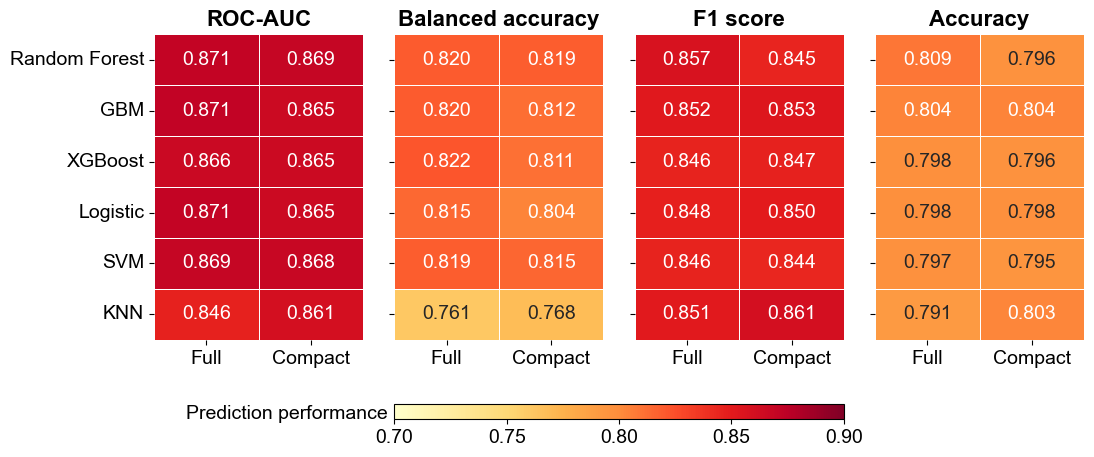

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec

# xticklabels = ['Model 1', '2', '3', '4', '5']
xticklabels = ['Full', 'Compact']

df = results.copy()
df = format_metric(df)

# metric 순서 정의
metric_order = ['ROC-AUC', 'Balanced accuracy', 'F1 score', 'Accuracy']

# DataFrame을 원하는 순서로 정렬
df['metric'] = df['metric'].replace('F1', 'F1 score')
df['metric'] = pd.Categorical(df['metric'], categories=metric_order, ordered=True)
df = df.sort_values('metric')

plt.rcParams['font.family'] = 'arial'
fontsize_title = 16
fontsize_label = 14

fig = plt.figure(figsize=(12, 5))
gs = GridSpec(2, 4, height_ratios=[1, 0.05], wspace=0.15, hspace=0.4)  # 컬러바의 높이를 줄임

axs = [fig.add_subplot(gs[0, i]) for i in range(4)]
cbar_ax = fig.add_subplot(gs[1, 1:3])  # 컬러바의 폭을 줄임

for idx, metric in enumerate(df['metric'].unique()[:4]):  # 처음 4개의 메트릭만 사용
    metric_data = df[df['metric'] == metric]
    pivot = pd.pivot_table(metric_data,
                           values='mean',
                           index='algorithm',
                           columns='model',
                           aggfunc='first')
    pivot.columns = [f'Model {i+1}' for i in range(len(pivot.columns))]
    pivot.index.name = None
    desired_order = ['Random Forest', 'GBM', 'XGBoost', 'Logistic', 'SVM', 'KNN']
    pivot = pivot.reindex(desired_order)
    
    ax = axs[idx]
    heatmap = sns.heatmap(pivot, annot=True, fmt=".3f", cmap='YlOrRd',
                          vmin=0.7, vmax=0.9,
                          annot_kws={'size': 14},
                          ax=ax,
                          cbar=False,
                          linewidths=0.5,
                          linecolor='w'
                          )  # 모든 히트맵에서 개별 컬러바 제거
    
    # ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize_label)
    ax.set_xticklabels(xticklabels, fontsize=fontsize_label)

    if idx == 0:  # 첫 번째 그래프에만 y축 레이블 표시
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=fontsize_label)
    else:  # 나머지 그래프의 y축 레이블 제거
        ax.set_yticklabels([])
        ax.set_ylabel('')
    
    ax.set_title(f"{metric}", fontsize=fontsize_title, fontweight='bold')

# 공통 컬러바 추가
if len(df['metric'].unique()) > 0:
    norm = plt.Normalize(vmin=0.7, vmax=0.9)
    sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
    cbar.set_ticks(MultipleLocator(0.05))
    cbar.ax.tick_params(labelsize=14)
    # cbar_ax.set_title('Prediction performance', fontsize=fontsize_label, fontweight='bold', loc='left', pad=10)

    fig.text(0.32, 0.12, 'Prediction performance', fontsize=fontsize_label, ha='right', va='center')

plt.savefig(fpath + f"figure/pdf/test_metric.pdf", bbox_inches='tight')
plt.savefig(fpath +f"figure/test_metric.png", bbox_inches='tight', dpi=600)

plt.show()

### Metric with error bar for model 2

/tmp/ipykernel_97266/4026628266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.metric = df.metric.replace({
/tmp/ipykernel_97266/1177106127.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['metric'] = df['metric'].replace('F1', 'F1 score')


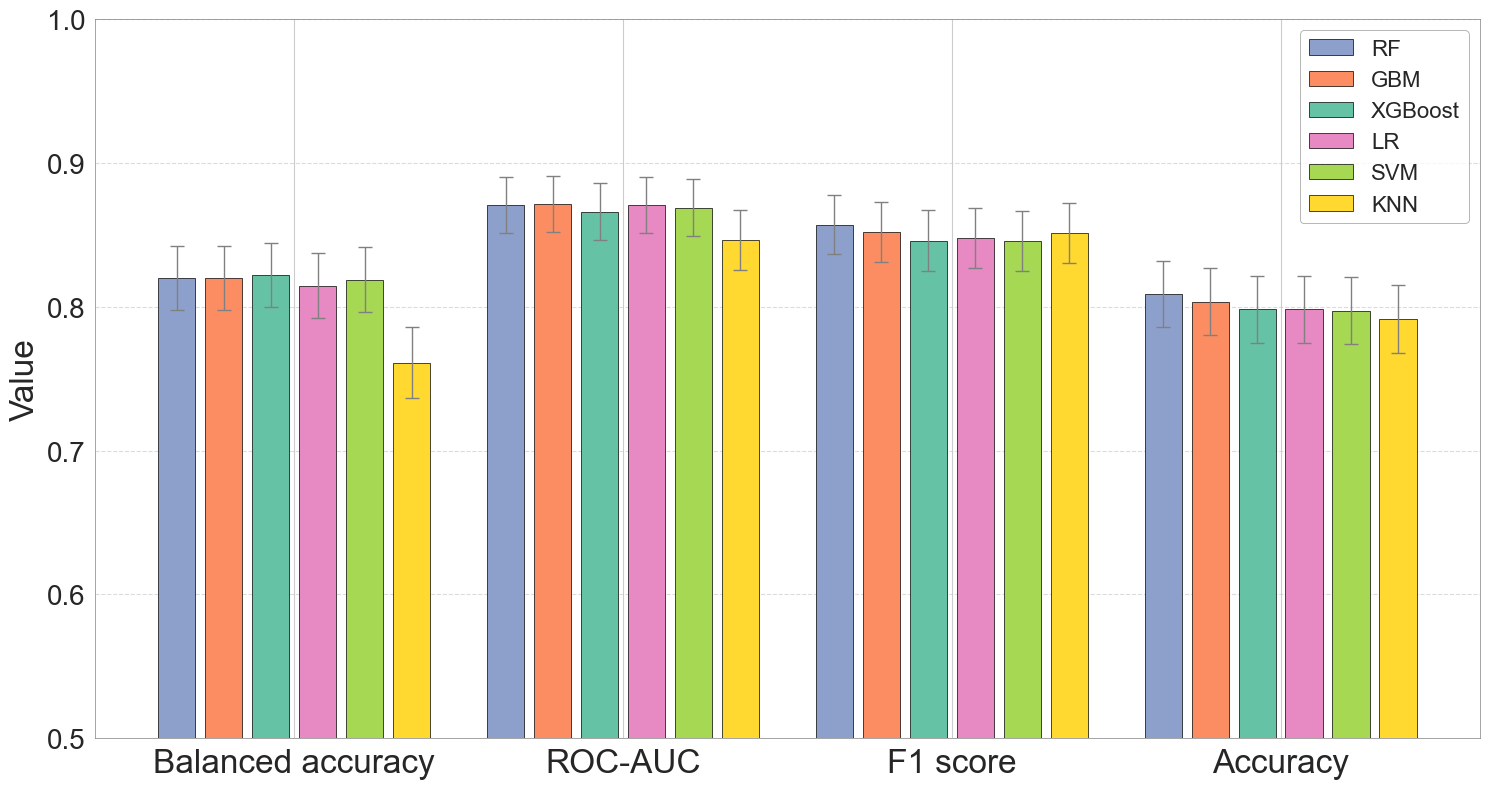

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def visualize_performance(results, i_model):
    if i_model == 1:
        title_text = f"Full model"
    elif i_model == 2:
        title_text = f"Compact model"
        
    # 데이터 준비
    df = results[results['model'] == i_model]
    df = format_metric(df)
    df['metric'] = df['metric'].replace('F1', 'F1 score')
    
    # 색상 설정 (색맹을 고려한 파스텔 톤)
    colors = ['#8da0cb', '#fc8d62', '#66c2a5', '#e78ac3', '#a6d854', '#ffd92f']
    
    # Seaborn 스타일 설정
    sns.set_style("whitegrid")
    plt.rcParams['font.family'] = 'arial'
    
    # 그래프 설정
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # metrics = df['metric'].unique()
    metrics = ['Balanced accuracy', 'ROC-AUC', 'F1 score', 'Accuracy']
    # algorithms = df['algorithm'].unique()
    algorithms = ['Random Forest', 'GBM', 'XGBoost', 'Logistic', 'SVM', 'KNN']
    legend_labels = ['RF', 'GBM', 'XGBoost', 'LR', 'SVM', 'KNN']
    
    n_metrics = len(metrics)
    n_algorithms = len(algorithms)
    
    # 각 metric별로 그래프 그리기
    for i, metric in enumerate(metrics):
        metric_data = df[df['metric'] == metric]
        x = np.arange(n_algorithms) + i * (n_algorithms + 1)
        for j, algorithm in enumerate(algorithms):
            algorithm_data = metric_data[metric_data['algorithm'] == algorithm]
            ax.bar(x[j], algorithm_data['mean'], yerr=algorithm_data['std'], capsize=5, width=0.8,
                  color=colors[j], label=legend_labels[j] if i == 0 else "",
                  edgecolor='black', linewidth=0.5, error_kw=dict(ecolor='gray', lw=1, capsize=5, capthick=1))
    
    # x축 레이블 추가
    ax.set_xticks(np.arange(n_metrics) * (n_algorithms + 1) + (n_algorithms - 1) / 2)
    ax.set_xticklabels(metrics, fontsize=24)
    ax.tick_params(axis='y', labelsize=20)
    
    # 그래프 꾸미기
    ax.set_ylabel('Value', fontsize=24)
    # ax.set_title(title_text, fontsize=24, fontweight='bold')
    ax.set_ylim(0.5, 1) # y축 범위 설정
    
    # 범례 추가
    legend = ax.legend(loc='upper right', frameon=True, fancybox=True, framealpha=0.8, edgecolor='gray', fontsize=16)
    legend.get_frame().set_linewidth(0.5)
    
    # 그리드 설정
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 축 라인 설정
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(0.5)
    
    # 그래프 저장
    plt.savefig(fpath + f"figure/pdf/performance_model-{i_model}.pdf", bbox_inches='tight')
    plt.savefig(fpath + f"figure/performance_model-{i_model}.png", bbox_inches='tight', dpi=600)
    plt.tight_layout()
    plt.show()

# 함수 사용 예시
visualize_performance(results, 1)

### ROC-AUC curve (single)

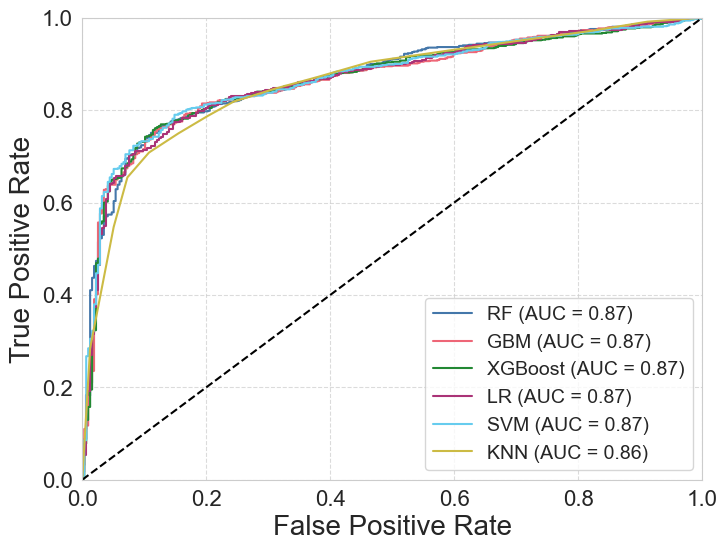

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

i_model = 2
if i_model == 1:
    title_text = f"ROC curve for the full model"
elif i_model == 2:
    title_text = f"ROC curve for the compact model"

models = ['Random Forest', 'GBM', 'XGBoost', 'Logistic', 'SVM', 'KNN']
colors = ['#4477AA', '#EE6677', '#228833', '#AA3377', '#66CCEE', '#CCBB44']

X_train, X_test, y_train, y_test = data_models[f"Model_{i_model}"]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(8, 6))
for model, color in zip(models, colors):
    best_model = best_models[f"Model_{i_model}_{model}"]
    y_pred = best_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # legend 표시 이름만 변경
    display_name = 'RF' if model == 'Random Forest' else 'LR' if model == 'Logistic' else model
    plt.plot(fpr, tpr, color=color, label=f'{display_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # 대각선 추가
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.legend(loc="lower right", fontsize=14, frameon=True, framealpha=0.8)
plt.savefig(fpath + f"figure/pdf/roc_model-{i_model}.pdf", bbox_inches='tight')
plt.savefig(fpath + f"figure/roc_model-{i_model}.png", bbox_inches='tight', dpi=600)
plt.show()

### ROC-AUC curve (multi)

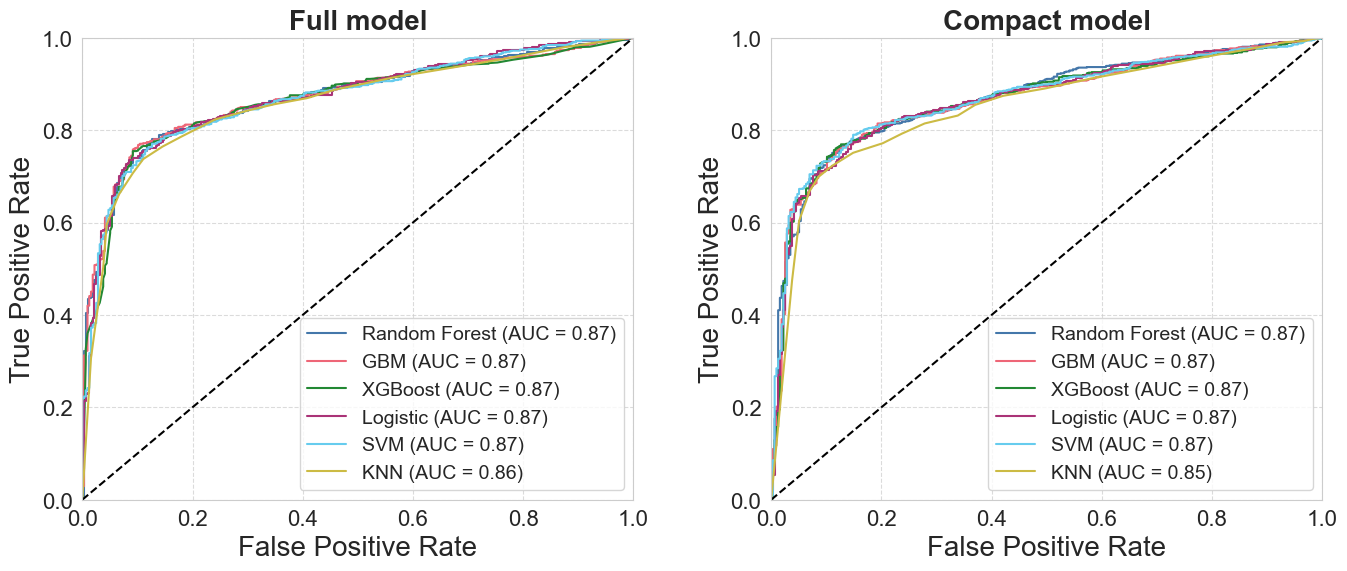

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

models = ['Random Forest', 'GBM', 'XGBoost', 'Logistic', 'SVM', 'KNN']
colors = ['#4477AA', '#EE6677', '#228833', '#AA3377', '#66CCEE', '#CCBB44']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for idx, i_model in enumerate([1, 2]):

    if i_model == 1:
        title_text = f"Full model"
    elif i_model == 2:
        title_text = f"Compact model"

    ax = ax1 if idx == 0 else ax2
    
    X_train, X_test, y_train, y_test = data_models[f"Model_{i_model}"]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model, color in zip(models, colors):
        best_model = best_models[f"Model_{i_model}_{model}"]
        y_pred = best_model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, color=color, label=f'{model} (AUC = {roc_auc:.2f})', lw=1.5)
    
    ax.plot([0, 1], [0, 1], 'k--')  # 대각선 추가
    ax.grid(True, linestyle='--', alpha=0.7)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel('False Positive Rate', fontsize=20)
    ax.set_ylabel('True Positive Rate', fontsize=20)

    ax.set_title(title_text, fontsize=20, fontweight='bold')
    ax.legend(loc="lower right", fontsize=14, frameon=True, framealpha=0.8)

plt.subplots_adjust(wspace=0.25)

# plt.tight_layout()
plt.savefig(fpath + f"figure/pdf/roc_all.pdf", bbox_inches='tight')
plt.savefig(fpath + f"figure/roc_all.png", bbox_inches='tight', dpi=600)
plt.show()

## SHAP

### Shap plot for all models

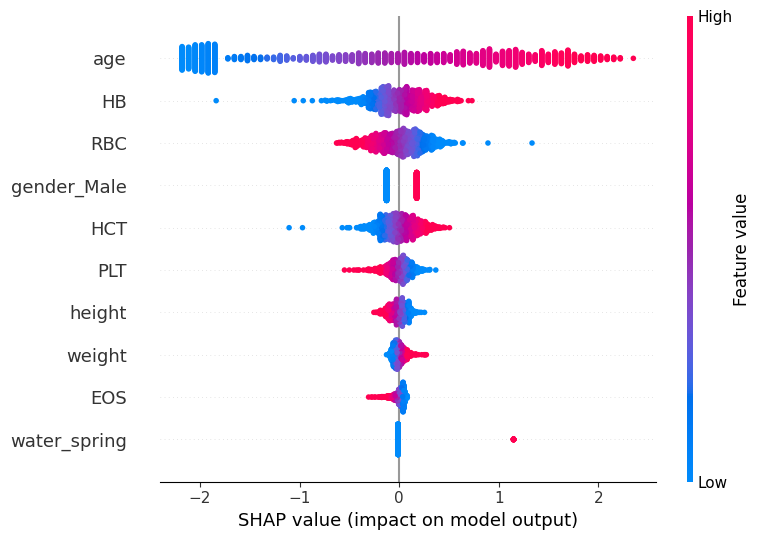

In [ ]:
i_model = 1
models = ['Logistic', 'Random Forest', 'GBM', 'XGBoost', 'SVM', 'KNN']

loaded_shap = load_results(f"result/results_shap-{i_model}.pickle")

for model in models:

    shap_values = loaded_shap[model]['shap_values']
    shap_test = loaded_shap[model]['shap_data']

    shap.summary_plot(shap_values, shap_test, max_display=10)


In [12]:
feature_rename_dict = {
    'BHg': 'Hg',
    'BPb': 'Pb',
    'can_food': 'Can food',
    'large_fish': 'Large fish',
    'sbp': 'SBP',
    'S_crea': 'Scr',
    'U_crea': 'Ucr',
    'gender_Male': 'Gender',
    'HB': 'Hb',
    'HCT': 'Hct',
    'PLT': 'Plt',
    'freezer_case_ziploc': 'Freezer ziploc',
    'freezer_case_plastic': 'Freezer plastic',
    'water_tap': 'Tap water',
    'microwave_food': 'Microwave',
    'fast_food': 'Fast food',
    'wrapped_food': 'Wrapped food',
    'sex_Male': 'Sex (male)',
    'paper_cup': 'Paper cup',
}

def rename_feature_labels(ax, rename_dict):
    ytick_labels = [label.get_text() for label in ax.get_yticklabels()]
    
    for i, label in enumerate(ytick_labels):
        if label in rename_dict:
            # Use the renamed label from dictionary
            ytick_labels[i] = rename_dict[label]
        else:
            # Only capitalize if the first letter is lowercase
            if len(ytick_labels[i]) > 0 and ytick_labels[i][0].islower():
                ytick_labels[i] = ytick_labels[i][0].upper() + ytick_labels[i][1:]
    
    ax.set_yticklabels(ytick_labels)

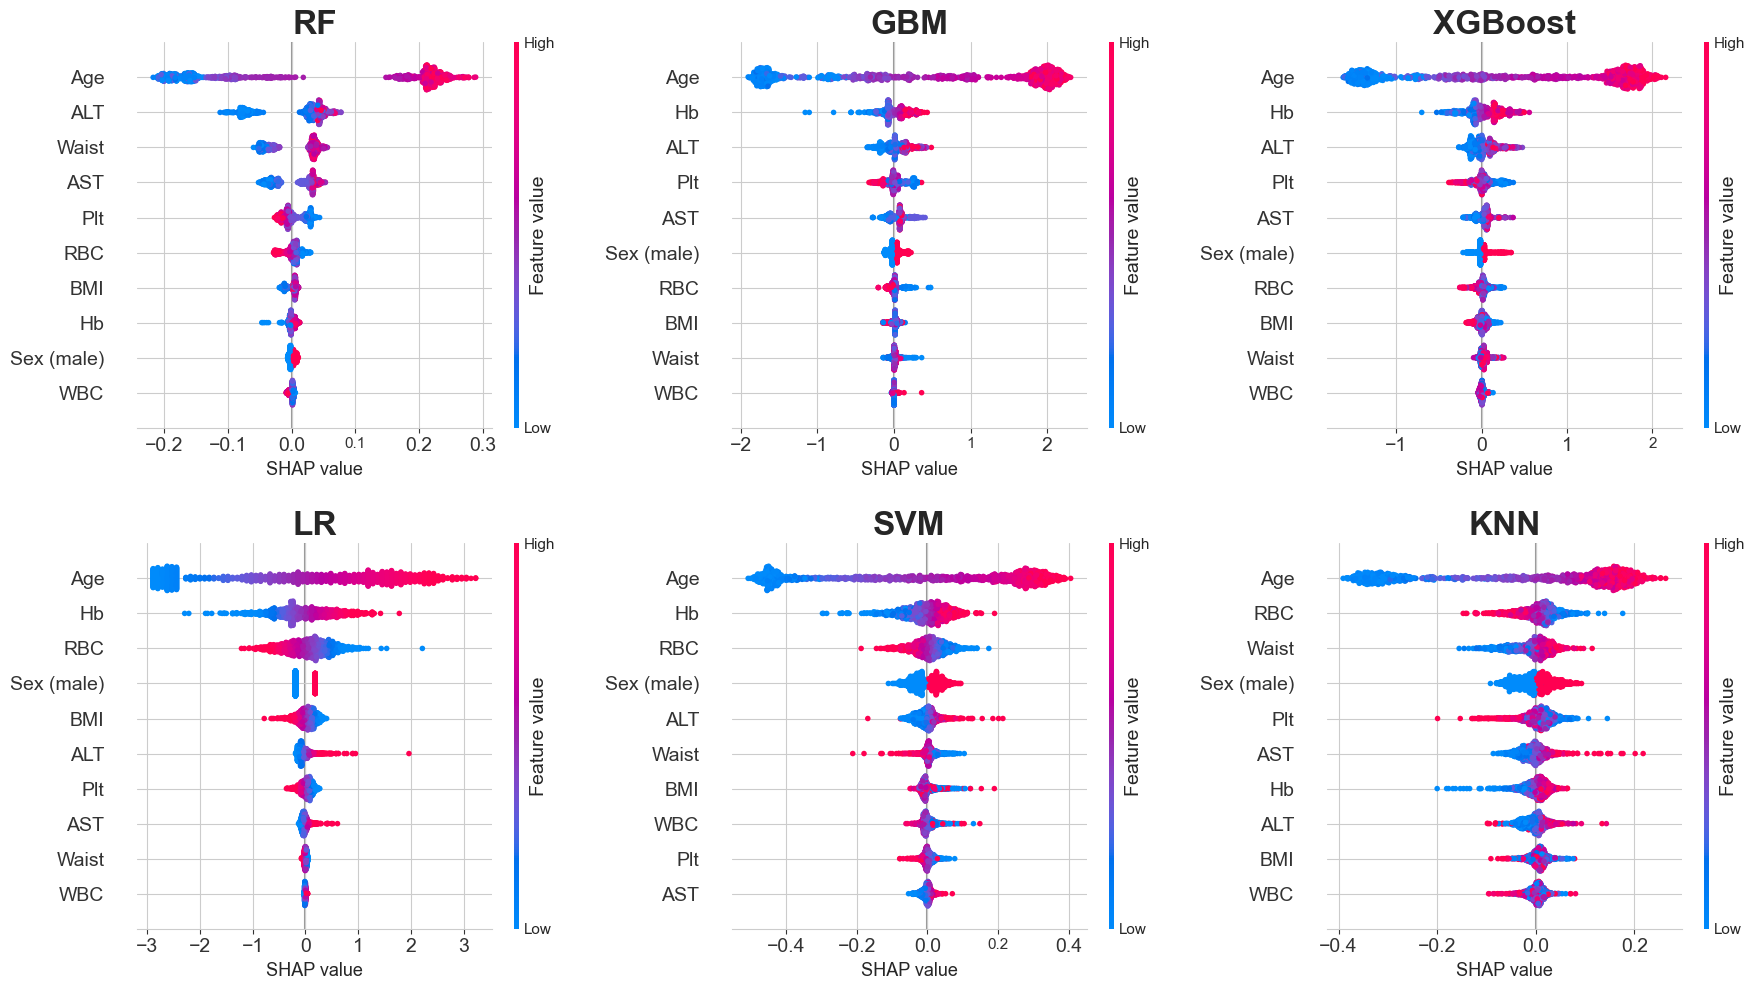

In [14]:
import matplotlib.pyplot as plt
import shap

i_model = 2

models = ['Random Forest', 'GBM', 'XGBoost', 'Logistic', 'SVM', 'KNN', ]
loaded_shap = load_results(f"result/results_shap-{i_model}.pickle")
plt.rcParams['font.family'] = 'arial'

figsize = (18, 10)
fig, axs = plt.subplots(2, 3, figsize=figsize)
tickfontsize = 14

for i, model in enumerate(models):
    shap_values = loaded_shap[model]['shap_values']
    shap_test = loaded_shap[model]['shap_data']
    
    ax = axs[i // 3, i % 3]
    plt.sca(ax)
    
    shap.summary_plot(shap_values, shap_test, max_display=10, show=False)
    
    rename_feature_labels(ax, feature_rename_dict)
    
    title = model
    if model == 'Random Forest':
        title = 'RF'
    elif model == 'Logistic':
        title = 'LR'
    
    plt.title(title, fontsize=24, fontweight='bold')
    plt.xticks(fontsize=tickfontsize)
    plt.yticks(fontsize=tickfontsize)
    plt.xlabel('SHAP value')
    
    cbar = fig.axes[-1]
    cbar.set_ylabel('Feature value', fontsize=tickfontsize, va='bottom')
    cbar.yaxis.set_label_coords(7, 0.5)

plt.gcf().set_size_inches(figsize)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig(fpath + f"figure/pdf/shap_value_model-{i_model}.pdf", bbox_inches='tight')
plt.savefig(fpath + f"figure/shap_value_model-{i_model}.png", bbox_inches='tight', dpi=600)

plt.show()

### Dependence plot (multiple)

In [16]:
feature_rename_dict_full = {
    'BHg': 'Serum mercury (μg/dL)',
    'BPb': 'Serum lead (μg/L)',
    'can_food': 'Can food diet',
    'sex_Male': 'Sex (male)',
    'age': 'Age (year)',
    'fish': 'Fish diet',
    'HB': 'Hemoglobin (g/dL)',
    'RBC': 'Red blood cell (million/μL)',
    'PLT': 'Platelet (thousand/μL)',
    'HCT': 'Hematocrit (%)',
    'waist': 'Waist (cm)',
    'ALT': 'Alanine aminotransferase (U/L)',
    'AST': 'Aspartate aminotransferase (U/L)',
    'fast_food': 'Fast food diet',
}

def get_display_name(feature_name):
    if feature_name in feature_rename_dict_full:
        return feature_rename_dict_full[feature_name]
    return feature_name

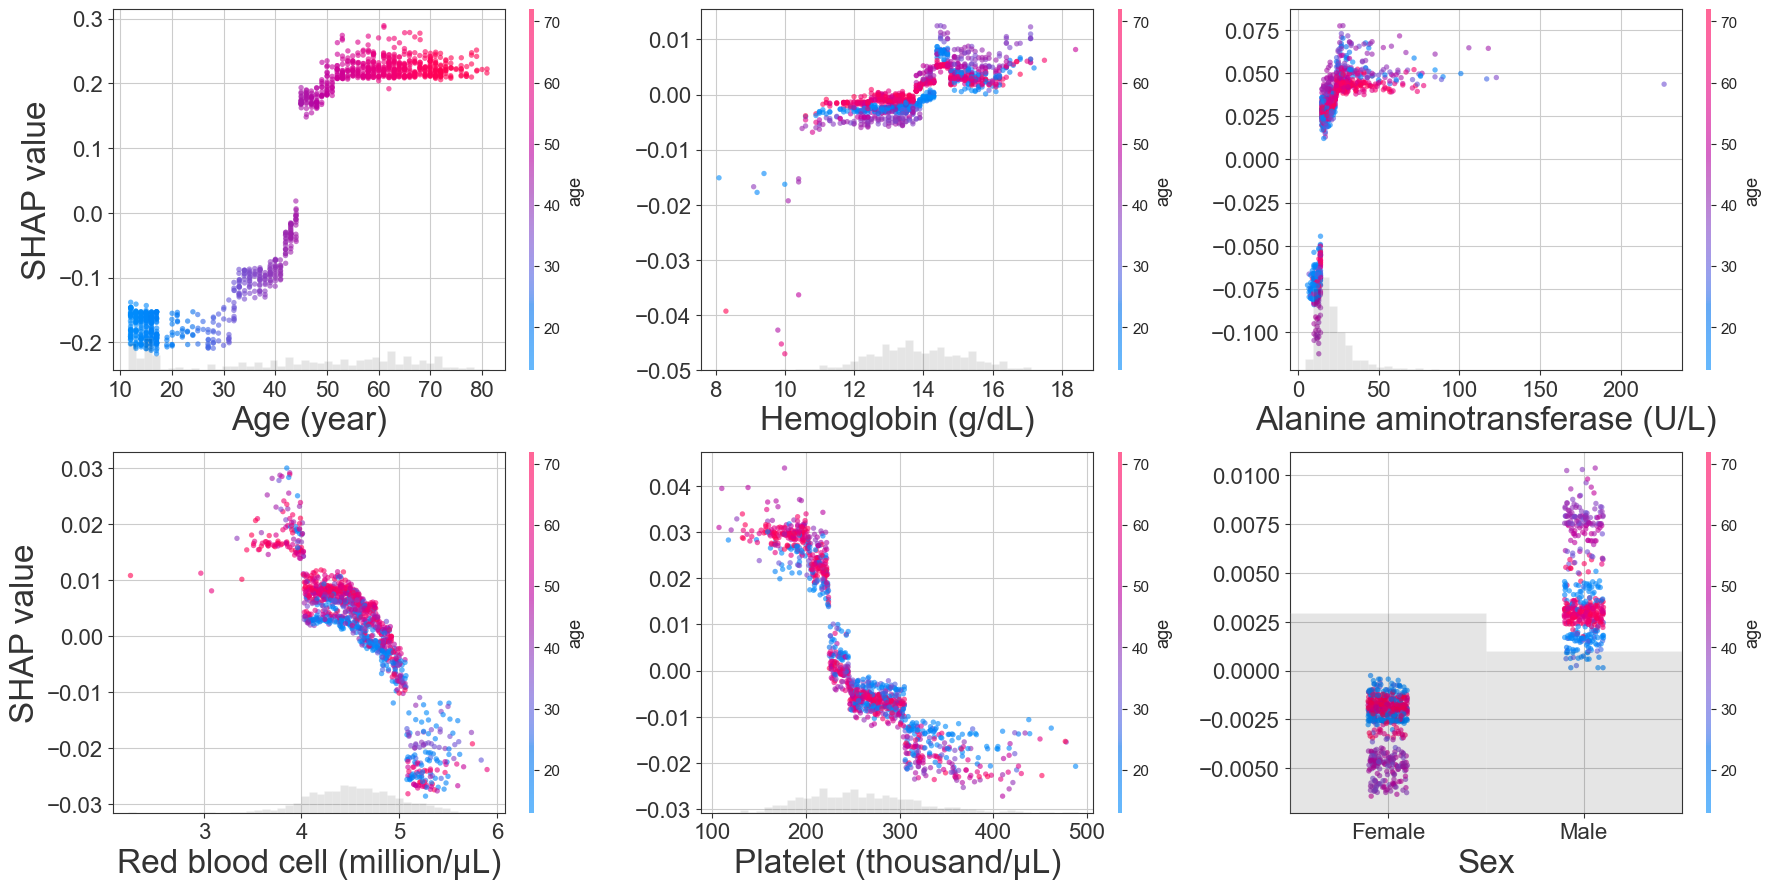

In [17]:
import shap
from sklearn.preprocessing import StandardScaler

i_model = 2
model = 'Random Forest'

if i_model == 1:
    # scatter_vars = ['age', 'BHg', 'sex_Male', 'fish', 'can_food', 'BPb']
    scatter_vars = ['age', 'BHg', 'BPb', 'fish', 'sex_Male', 'fast_food']
elif i_model == 2:
    scatter_vars = ['age', 'HB', 'ALT', 'RBC', 'PLT', 'sex_Male'] # ALT 

loaded_shap = load_results(f"result/results_shap-{i_model}.pickle")
shap_values = loaded_shap[model]['shap_values']
shap_test = loaded_shap[model]['shap_data']

X_train, X_test, y_train, y_test = data_models[f"Model_{i_model}"]

scaler = StandardScaler()
scaler.fit(X_train)
shap_test_rescaled = scaler.inverse_transform(shap_test)
shap_values.data = shap_test_rescaled

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'arial'

figsize = (18, 9)
fig, axs = plt.subplots(2, 3, figsize=figsize)

fontsize_label = 24

for idx, scatter_var in enumerate(scatter_vars):
    row = idx // 3
    col = idx % 3
    ax = axs[row, col]

    shap.plots.scatter(shap_values[:, scatter_var], ax=ax, show=False, alpha=0.6, dot_size=15, color=shap_values[:, 'age'])

    for spine in ax.spines.values():
        spine.set_visible(True)

    if col == 0:
        plt.ylabel('SHAP value', fontsize=fontsize_label)
    else:
        plt.ylabel('')
        
    display_name = get_display_name(scatter_var)
    plt.xlabel(display_name, fontsize=fontsize_label)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    if scatter_var == 'sex_Male':
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Female', 'Male'])
        ax.set_xlabel('Sex')
    # elif scatter_var == 'can_food':
    elif scatter_var == 'fast_food':
        ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
        labels = ['Rare', '', '', '1/week', '', '', '1/day', '', '3/day']
        ax.set_xticklabels(labels)
    elif scatter_var == 'fish':
        ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
        labels = ['Rare', '', '', '1/week', '', '', '1/day']
        ax.set_xticklabels(labels)

plt.subplots_adjust(hspace=0.3)

plt.savefig(fpath + f"figure/pdf/shap_dependence_model-{i_model}.pdf", bbox_inches='tight')
plt.savefig(fpath + f"figure/shap_dependence_model-{i_model}.png", bbox_inches='tight', dpi=600)

plt.tight_layout()
plt.show()